
## Анализ и визуализация данных на языке Python.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (12,5)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
np.set_printoptions(linewidth=110)
np.set_printoptions(legacy="1.25")

### Агрегирующие функции

In [2]:
np.random.seed(42)
a = np.random.randint(1, 10, (2, 4, 3))
a

array([[[7, 4, 8],
        [5, 7, 3],
        [7, 8, 5],
        [4, 8, 8]],

       [[3, 6, 5],
        [2, 8, 6],
        [2, 5, 1],
        [6, 9, 1]]])

In [3]:
# Среднее массива
a.mean() # np.mean(a)

5.333333333333333

In [4]:
# Второй способ
np.mean(a)

5.333333333333333

In [5]:
a.shape

(2, 4, 3)

In [6]:
a
a.mean(axis=1) # Вдоль столбца, по строкам

array([[[7, 4, 8],
        [5, 7, 3],
        [7, 8, 5],
        [4, 8, 8]],

       [[3, 6, 5],
        [2, 8, 6],
        [2, 5, 1],
        [6, 9, 1]]])

array([[5.75, 6.75, 6.  ],
       [3.25, 7.  , 3.25]])

In [7]:
a_copy = a.astype(np.float64)
a_copy[0, 0, 0] = np.nan
a_copy.sum() # Итого - это np.nan. Решение: np.nansum(a_copy)
np.nansum(a_copy)
a.sum() # np.sum(a)
a

nan

121.0

128

array([[[7, 4, 8],
        [5, 7, 3],
        [7, 8, 5],
        [4, 8, 8]],

       [[3, 6, 5],
        [2, 8, 6],
        [2, 5, 1],
        [6, 9, 1]]])

In [8]:
a.sum(0) # Указание оси

array([[10, 10, 13],
       [ 7, 15,  9],
       [ 9, 13,  6],
       [10, 17,  9]])

In [9]:
a

array([[[7, 4, 8],
        [5, 7, 3],
        [7, 8, 5],
        [4, 8, 8]],

       [[3, 6, 5],
        [2, 8, 6],
        [2, 5, 1],
        [6, 9, 1]]])

In [10]:
a2d = a.mean(axis=1); a2d

array([[5.75, 6.75, 6.  ],
       [3.25, 7.  , 3.25]])

In [11]:
np.sum(a2d, axis=0) # shape = (3,)

array([ 9.  , 13.75,  9.25])

In [12]:
a2d

array([[5.75, 6.75, 6.  ],
       [3.25, 7.  , 3.25]])

In [13]:
a2d
a2d[:, :2].sum(1) # Out: вспомнить всё и проверить

array([[5.75, 6.75, 6.  ],
       [3.25, 7.  , 3.25]])

array([12.5 , 10.25])

In [14]:
a2d

array([[5.75, 6.75, 6.  ],
       [3.25, 7.  , 3.25]])

In [15]:
a2d.min(axis=1) # Out: Вспомнить всё и проверить

array([5.75, 3.25])

In [16]:
a2d.max(0) # axis=0

array([5.75, 7.  , 6.  ])

In [17]:
a

array([[[7, 4, 8],
        [5, 7, 3],
        [7, 8, 5],
        [4, 8, 8]],

       [[3, 6, 5],
        [2, 8, 6],
        [2, 5, 1],
        [6, 9, 1]]])

In [18]:
a
# Аргумент keepdims=True сохраняет размерность итогового массива.
b = a.sum(1, keepdims=False)
b

array([[[7, 4, 8],
        [5, 7, 3],
        [7, 8, 5],
        [4, 8, 8]],

       [[3, 6, 5],
        [2, 8, 6],
        [2, 5, 1],
        [6, 9, 1]]])

array([[23, 27, 24],
       [13, 28, 13]])

In [19]:
# Функция sort() выполняет in-place(на месте) сортировку
# b.sort() тоже самое, что и b.sort(-1)
b.sort(); b

array([[23, 24, 27],
       [13, 13, 28]])

In [20]:
b.sort(0) # Сортировка с указанием оси
b
np.flip(b) # Reverse

array([[13, 13, 27],
       [23, 24, 28]])

array([[28, 24, 23],
       [27, 13, 13]])

In [21]:
c = np.random.randint(1, 50, (6, 5))
c
np.random.shuffle(c)
c = c[:, [4, 0, 1, 3, 2]]
c

array([[27, 42, 28, 16, 15],
       [47, 44,  3, 37,  7],
       [21,  9, 39, 18,  4],
       [25, 14,  9, 26,  2],
       [20, 28, 47,  7, 44],
       [ 8, 47, 35, 14, 17]])

array([[15, 27, 42, 16, 28],
       [ 4, 21,  9, 18, 39],
       [44, 20, 28,  7, 47],
       [17,  8, 47, 14, 35],
       [ 7, 47, 44, 37,  3],
       [ 2, 25, 14, 26,  9]])

In [22]:
# Будет отсортирована каждая строка
c.sort(1) # c.sort(), c.sort(-1)
c

array([[15, 16, 27, 28, 42],
       [ 4,  9, 18, 21, 39],
       [ 7, 20, 28, 44, 47],
       [ 8, 14, 17, 35, 47],
       [ 3,  7, 37, 44, 47],
       [ 2,  9, 14, 25, 26]])

In [23]:
new_a = np.arange(16).reshape(4,4); new_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [24]:
# Редуцирование происходит по строкам вдоль каждого столбца
# Кумулятивная сумма по нарастанию вдоль каждого столбца
new_a.cumsum(0)

array([[ 0,  1,  2,  3],
       [ 4,  6,  8, 10],
       [12, 15, 18, 21],
       [24, 28, 32, 36]])

In [25]:
new_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [26]:
new_a.cumsum(1)

array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22],
       [ 8, 17, 27, 38],
       [12, 25, 39, 54]])

In [27]:
new_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [28]:
new_aa = new_a.copy()
new_aa[0,0] = 1
# Кумулятивное произведение
res = new_aa.cumprod(1); res

array([[    1,     1,     2,     6],
       [    4,    20,   120,   840],
       [    8,    72,   720,  7920],
       [   12,   156,  2184, 32760]])

In [29]:
res

array([[    1,     1,     2,     6],
       [    4,    20,   120,   840],
       [    8,    72,   720,  7920],
       [   12,   156,  2184, 32760]])

In [30]:
res.mean() # Среднее
np.median(res) # Медиана

2801.625

46.0

In [31]:
res.std() # стандартное отклонение

7970.2446627675745

In [32]:
res.var()  # дисперсия

63524799.984375

## Работа с датами

In [33]:
np.datetime64('today')

numpy.datetime64('2025-06-01')

In [34]:
yesterday = np.datetime64('today') - np.timedelta64(1)
today     = np.datetime64('today')
tomorrow  = np.datetime64('today') + np.timedelta64(1)
yesterday, today, tomorrow

(numpy.datetime64('2025-05-31'),
 numpy.datetime64('2025-06-01'),
 numpy.datetime64('2025-06-02'))

In [35]:
# Дата как строка
# https://strftime.org/
np.datetime_as_string(today, unit='D') # datetime -> np.str_
np.datetime_as_string(today, unit='ms')

from datetime import datetime

print(np.datetime_as_string(np.datetime64(datetime.now()), unit='ms'))
print(datetime.now().microsecond)
print(datetime.now().timestamp()) # Кол-во секунд от начала эпохи UNIX(01.01.1970)

'2025-06-01'

'2025-06-01T00:00:00.000'

2025-06-01T12:19:04.326
326905
1748780344.326986


In [36]:
data = np.arange('2020-08', '2020-09', dtype='datetime64[D]'); data

array(['2020-08-01', '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06', '2020-08-07',
       '2020-08-08', '2020-08-09', '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13', '2020-08-14',
       '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21',
       '2020-08-22', '2020-08-23', '2020-08-24', '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28',
       '2020-08-29', '2020-08-30', '2020-08-31'], dtype='datetime64[D]')

In [37]:
data3 = np.arange('2021-07', '2021-08', dtype='datetime64[W]'); data3

array(['2021-07-01', '2021-07-08', '2021-07-15', '2021-07-22'], dtype='datetime64[W]')

In [38]:
data1 = np.arange('2020', '2021', dtype='datetime64[M]'); data1

array(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09',
       '2020-10', '2020-11', '2020-12'], dtype='datetime64[M]')

In [39]:
data2 = np.arange('2020', '2029', dtype='datetime64[Y]'); data2

array(['2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028'], dtype='datetime64[Y]')

In [40]:
data.astype(np.str_)

array(['2020-08-01', '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06', '2020-08-07',
       '2020-08-08', '2020-08-09', '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13', '2020-08-14',
       '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21',
       '2020-08-22', '2020-08-23', '2020-08-24', '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28',
       '2020-08-29', '2020-08-30', '2020-08-31'], dtype='<U28')

## Файловый ввод и вывод массивов

In [41]:
res

array([[    1,     1,     2,     6],
       [    4,    20,   120,   840],
       [    8,    72,   720,  7920],
       [   12,   156,  2184, 32760]])

In [42]:
data

array(['2020-08-01', '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06', '2020-08-07',
       '2020-08-08', '2020-08-09', '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13', '2020-08-14',
       '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21',
       '2020-08-22', '2020-08-23', '2020-08-24', '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28',
       '2020-08-29', '2020-08-30', '2020-08-31'], dtype='datetime64[D]')

#### Сохранение в текстовый файл

In [43]:
np.savetxt('out_res.txt', res, delimiter=';', fmt='%.2f')
np.savetxt('out_data.txt', data, fmt='%s')

#### Загрузка из файла

In [44]:
# По умолчанию np.float64
data_in = np.loadtxt('out_data.txt', dtype=np.datetime64); data_in

array(['2020-08-01', '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06', '2020-08-07',
       '2020-08-08', '2020-08-09', '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13', '2020-08-14',
       '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21',
       '2020-08-22', '2020-08-23', '2020-08-24', '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28',
       '2020-08-29', '2020-08-30', '2020-08-31'], dtype='datetime64[D]')

In [45]:
res_in = np.loadtxt('out_res.txt', delimiter=';'); res_in.astype(np.int64)

array([[    1,     1,     2,     6],
       [    4,    20,   120,   840],
       [    8,    72,   720,  7920],
       [   12,   156,  2184, 32760]])

#### Сохранение в специальный формат numpy

In [46]:
a = np.random.randn(20).reshape(5, 4);a

array([[ 2.77831304,  1.19363972,  0.21863832,  0.88176104],
       [-1.00908534, -1.58329421,  0.77370042, -0.53814166],
       [-1.3466781 , -0.88059127, -1.1305523 ,  0.13442888],
       [ 0.58212279,  0.88774846,  0.89433233,  0.7549978 ],
       [-0.20716589, -0.62347739, -1.50815329,  1.09964698]])

In [47]:
# сохранить в файл с расширением npy(формат библиотеки numpy)
np.save('array_5x4.npy', a)

In [48]:
a_in = np.load('array_5x4.npy'); a_in

array([[ 2.77831304,  1.19363972,  0.21863832,  0.88176104],
       [-1.00908534, -1.58329421,  0.77370042, -0.53814166],
       [-1.3466781 , -0.88059127, -1.1305523 ,  0.13442888],
       [ 0.58212279,  0.88774846,  0.89433233,  0.7549978 ],
       [-0.20716589, -0.62347739, -1.50815329,  1.09964698]])

In [49]:
np.savetxt('array_out.csv', a, delimiter=',')

In [50]:
a_txt = np.loadtxt('array_out.csv', delimiter=','); a_txt

array([[ 2.77831304,  1.19363972,  0.21863832,  0.88176104],
       [-1.00908534, -1.58329421,  0.77370042, -0.53814166],
       [-1.3466781 , -0.88059127, -1.1305523 ,  0.13442888],
       [ 0.58212279,  0.88774846,  0.89433233,  0.7549978 ],
       [-0.20716589, -0.62347739, -1.50815329,  1.09964698]])

#### Пару тестов

In [51]:
e6 = np.random.randn(1_000_000).reshape(10, 100_000)
np.save('array_e6.npy', e6)

In [52]:
%timeit e6_in = np.load('array_e6.npy')

2.65 ms ± 169 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [53]:
np.savetxt('array_e6.csv', e6, delimiter=',')

In [54]:
%timeit e6_csv = np.loadtxt('array_e6.csv', delimiter=',')

492 ms ± 23.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [55]:
e7 = np.random.randn(10_000_000).reshape(1_000_000, 10)
np.save('array_e7.npy', e7)

In [56]:
%timeit e7_in = np.load('array_e7.npy')

34.6 ms ± 3.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [57]:
np.savetxt('array_e7.csv', e7)

In [58]:
%time e7_csv = np.loadtxt('array_e7.csv')

CPU times: user 5.84 s, sys: 181 ms, total: 6.02 s
Wall time: 6.02 s


#### Сохранение в виде архива

In [59]:
data_in

array(['2020-08-01', '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06', '2020-08-07',
       '2020-08-08', '2020-08-09', '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13', '2020-08-14',
       '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21',
       '2020-08-22', '2020-08-23', '2020-08-24', '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28',
       '2020-08-29', '2020-08-30', '2020-08-31'], dtype='datetime64[D]')

In [60]:
a_in

array([[ 2.77831304,  1.19363972,  0.21863832,  0.88176104],
       [-1.00908534, -1.58329421,  0.77370042, -0.53814166],
       [-1.3466781 , -0.88059127, -1.1305523 ,  0.13442888],
       [ 0.58212279,  0.88774846,  0.89433233,  0.7549978 ],
       [-0.20716589, -0.62347739, -1.50815329,  1.09964698]])

In [61]:
# Сохраняем несколько массивов в один файл
np.savez('array_archive.npz', a=data_in, b=a_in)

In [62]:
# Загрузка из файла
archive = np.load('array_archive.npz')

In [63]:
archive.__dict__

{'_files': ['a.npy', 'b.npy'],
 'files': ['a', 'b'],
 'allow_pickle': False,
 'max_header_size': 10000,
 'pickle_kwargs': {'encoding': 'ASCII', 'fix_imports': True},
 'zip': <zipfile.ZipFile file=<_io.BufferedReader name='array_archive.npz'> mode='r'>,
 'f': <numpy.lib._npyio_impl.BagObj at 0x7c115f792010>,
 'fid': <_io.BufferedReader name='array_archive.npz'>}

In [64]:
archive.__class__.__mro__

(numpy.lib.npyio.NpzFile,
 collections.abc.Mapping,
 collections.abc.Collection,
 collections.abc.Sized,
 collections.abc.Iterable,
 collections.abc.Container,
 object)

In [65]:
vals = archive.values()  # dict
for item in vals:
    print(item)

['2020-08-01' '2020-08-02' '2020-08-03' '2020-08-04' '2020-08-05' '2020-08-06' '2020-08-07' '2020-08-08'
 '2020-08-09' '2020-08-10' '2020-08-11' '2020-08-12' '2020-08-13' '2020-08-14' '2020-08-15' '2020-08-16'
 '2020-08-17' '2020-08-18' '2020-08-19' '2020-08-20' '2020-08-21' '2020-08-22' '2020-08-23' '2020-08-24'
 '2020-08-25' '2020-08-26' '2020-08-27' '2020-08-28' '2020-08-29' '2020-08-30' '2020-08-31']
[[ 2.77831304  1.19363972  0.21863832  0.88176104]
 [-1.00908534 -1.58329421  0.77370042 -0.53814166]
 [-1.3466781  -0.88059127 -1.1305523   0.13442888]
 [ 0.58212279  0.88774846  0.89433233  0.7549978 ]
 [-0.20716589 -0.62347739 -1.50815329  1.09964698]]


In [66]:
archive['b']

array([[ 2.77831304,  1.19363972,  0.21863832,  0.88176104],
       [-1.00908534, -1.58329421,  0.77370042, -0.53814166],
       [-1.3466781 , -0.88059127, -1.1305523 ,  0.13442888],
       [ 0.58212279,  0.88774846,  0.89433233,  0.7549978 ],
       [-0.20716589, -0.62347739, -1.50815329,  1.09964698]])

In [67]:
archive['a']

array(['2020-08-01', '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06', '2020-08-07',
       '2020-08-08', '2020-08-09', '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13', '2020-08-14',
       '2020-08-15', '2020-08-16', '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21',
       '2020-08-22', '2020-08-23', '2020-08-24', '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28',
       '2020-08-29', '2020-08-30', '2020-08-31'], dtype='datetime64[D]')

### Немного статистики:
Квантили, квартили, процентили

In [68]:
a = np.array([[10, 7, 4], [3, 2, 1]])
print(a)
np.percentile(a, 25, axis=1)

[[10  7  4]
 [ 3  2  1]]


array([5.5, 1.5])

In [69]:
print(a)
np.percentile(a, 25, axis=0)

[[10  7  4]
 [ 3  2  1]]


array([4.75, 3.25, 1.75])

In [70]:
large_array = np.random.normal(0.0, 5.0, (100,))
per_95 = np.percentile(large_array, 95)
per_05 = np.percentile(large_array, 5)
per_05, per_95

(-6.576253236805279, 10.519884946017015)

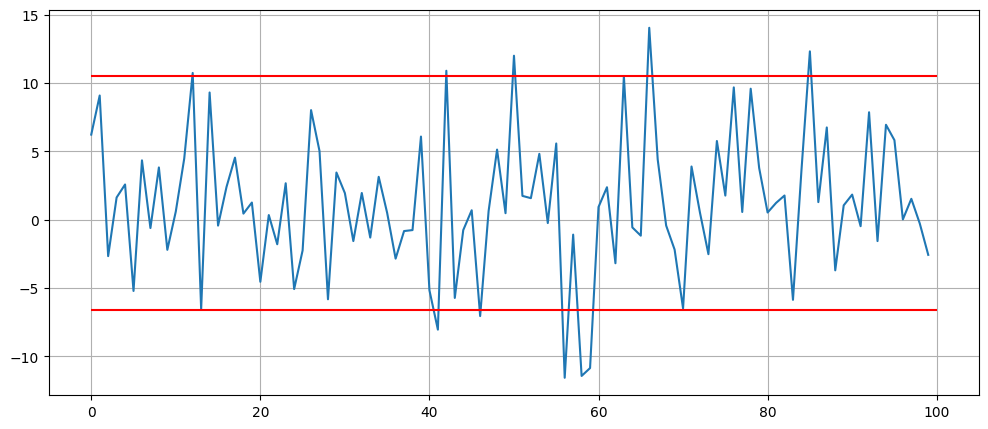

In [71]:
plt.plot(large_array)
plt.hlines([per_95, per_05], xmin=0, xmax=100, colors='red')
plt.grid();

---